In [1]:
# import libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
boston = pd.read_csv('/content/boston.csv')
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


split train test

In [4]:
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

feature_boston_train, feature_boston_test, target_boston_train, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

In [5]:
# calculate VIF scores
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.713187
2,zn,2.465631
3,indus,3.877855
4,chas,1.096674
5,nox,4.469150
6,rm,1.947809
7,age,2.989948
8,dis,4.168578
9,rad,7.658316
10,tax,8.943301


**There** are several features with high VIF scores:
1. `tax`
2. `rad`
3. `nox`
4. `dis`
5. `indus`

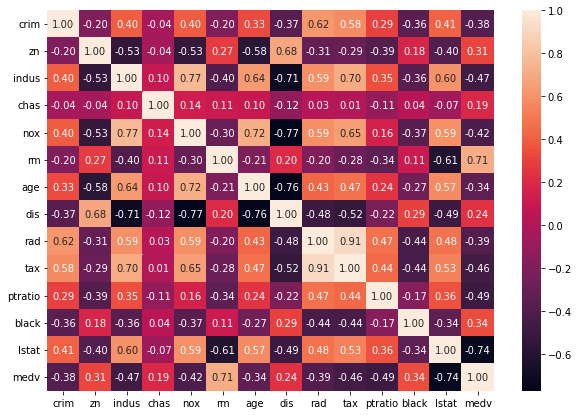

In [6]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Based on the heat map result, Researcher choose to retain nox, dis, indus. Therefore, we need to drop:

- rad
- tax

In [7]:
# drop redundant features
feature_boston_train = feature_boston_train.drop(columns=['nox','tax'])
feature_boston_test = feature_boston_test.drop(columns=['nox','tax'])

In [8]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as vif 
from statsmodels.tools.tools import add_constant

X = add_constant(feature_boston_train)

vif_df = pd.DataFrame([vif(X.values, i) 
               for i in range(X.shape[1])], 
              index=X.columns).reset_index()
vif_df.columns = ['feature','vif_score']
vif_df = vif_df.loc[vif_df.feature!='const']
vif_df

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


,feature,vif_score
1,crim,1.705337
2,zn,2.267826
3,indus,2.908721
4,chas,1.079183
5,rm,1.920317
6,age,2.818560
7,dis,3.847355
8,rad,2.570792
9,ptratio,1.626674
10,black,1.318780


The variable that has the highest VIF has been dropped

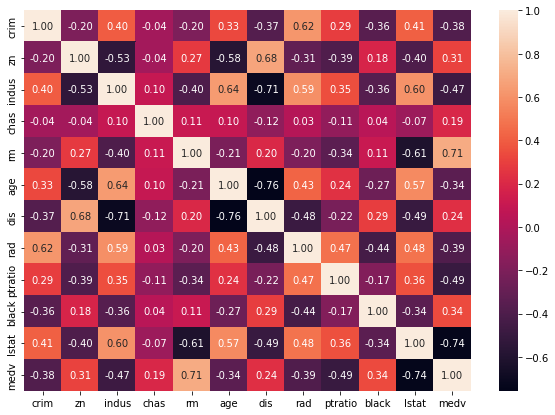

In [9]:
# heatmap correlation
boston_train = pd.concat([feature_boston_train, target_boston_train], axis=1)
corr = boston_train.corr()

plt.figure(figsize=(10,7))
sns.heatmap(corr, annot=True, fmt='.2f')
plt.show()

Choose the best lambda

In [10]:
# split train test
from sklearn.model_selection import train_test_split

feature = boston.drop(columns='medv')
target = boston[['medv']]

feature_boston_pretrain, feature_boston_test, target_boston_pretrain, target_boston_test = train_test_split(feature, target, test_size=0.20, random_state=42)

feature_boston_train, feature_boston_validation, target_boston_train, target_boston_validation = train_test_split(feature_boston_pretrain, target_boston_pretrain, test_size=0.20, random_state=42)

In [11]:
feature_boston_train = feature_boston_train.drop(columns=['nox','tax'])
feature_boston_validation = feature_boston_validation.drop(columns=['nox','tax'])
feature_boston_test = feature_boston_test.drop(columns=['nox','tax'])

In [12]:
from sklearn.linear_model import Ridge

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
ridge_reg_pointzeroone = Ridge(alpha=0.01, random_state=42)
ridge_reg_pointone = Ridge(alpha=0.1, random_state=42)
ridge_reg_one = Ridge(alpha=1, random_state=42)
ridge_reg_ten = Ridge(alpha=10, random_state=42)

# fit the model (training)
ridge_reg_pointzeroone.fit(X_boston_train, y_boston_train)
ridge_reg_pointone.fit(X_boston_train, y_boston_train)
ridge_reg_one.fit(X_boston_train, y_boston_train)
ridge_reg_ten.fit(X_boston_train, y_boston_train)

Ridge(alpha=10, random_state=42)

In [13]:
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [ridge_reg_pointzeroone,
          ridge_reg_pointone,
          ridge_reg_one,
          ridge_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of Ridge regression model with alpha = {alpha} is {rmse}')

RMSE of Ridge regression model with alpha = 0.01 is 4.9100180836609475
RMSE of Ridge regression model with alpha = 0.1 is 4.909341813740431
RMSE of Ridge regression model with alpha = 1.0 is 4.902793924301715
RMSE of Ridge regression model with alpha = 10 is 4.852554684014988


The best lambda (alpha) is 10

Lasso

In [14]:
from sklearn.linear_model import Lasso

# train the model
X_boston_train = feature_boston_train.to_numpy()
y_boston_train = target_boston_train.to_numpy()
y_boston_train = y_boston_train.reshape(len(y_boston_train),)

# define the model
lasso_reg_pointzeroone = Lasso(alpha=0.01, random_state=42)
lasso_reg_pointone = Lasso(alpha=0.1, random_state=42)
lasso_reg_one = Lasso(alpha=1, random_state=42)
lasso_reg_ten = Lasso(alpha=10, random_state=42)

# fit the model (training)
lasso_reg_pointzeroone.fit(X_boston_train, y_boston_train)
lasso_reg_pointone.fit(X_boston_train, y_boston_train)
lasso_reg_one.fit(X_boston_train, y_boston_train)
lasso_reg_ten.fit(X_boston_train, y_boston_train)

Lasso(alpha=10, random_state=42)

In [15]:
from sklearn.metrics import mean_squared_error

X_boston_validation = feature_boston_validation.to_numpy()
y_boston_validation = target_boston_validation.to_numpy()
y_boston_validation = y_boston_validation.reshape(len(y_boston_validation),)

alphas = [0.01, 0.1, 1., 10]
models = [lasso_reg_pointzeroone,
          lasso_reg_pointone,
          lasso_reg_one,
          lasso_reg_ten]

for model, alpha in zip(models, alphas):
    y_predict_validation = model.predict(X_boston_validation)
    rmse = np.sqrt(mean_squared_error(y_boston_validation,y_predict_validation))
    print(f'RMSE of lasso regression model with alpha = {alpha} is {rmse}')

RMSE of lasso regression model with alpha = 0.01 is 4.906171989652139
RMSE of lasso regression model with alpha = 0.1 is 4.886477755903591
RMSE of lasso regression model with alpha = 1.0 is 4.83300631441224
RMSE of lasso regression model with alpha = 10 is 5.436636308051355


The bebst lamda or alpha is one


Model evaluation

In [16]:
ridge_best = ridge_reg_ten

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[ridge_best.intercept_] + list(ridge_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,14.626838
1,crim,-0.098172
2,zn,0.028737
3,indus,-0.105791
4,chas,1.860440
5,rm,4.707228
6,age,-0.011543
7,dis,-1.179954
8,rad,0.042378
9,ptratio,-0.758341


Model Ridge --> medv = 14.626 - 0.098 crim 
                + 0.028 zn - 0.105 indus 
                + 1.86 chas + 4.707 rm 
                - 0.011 age - 1.17 dis 
                + 0.042 rad - 0.758 pratio 
                + 0.013 black - 0.539 istat

interpret sample of coef:
- crim --> one point increase in coef crim can decrease as much as 0.098 point to the model


In [25]:
lasso_best = lasso_reg_one

coef_df = pd.DataFrame({
    'feature':['intercept'] + feature_boston_train.columns.tolist(),
    'coefficient':[lasso_best.intercept_] + list(lasso_best.coef_)
})

coef_df

,feature,coefficient
0,intercept,26.245932
1,crim,-0.065050
2,zn,0.019857
3,indus,-0.034062
4,chas,0.000000
5,rm,2.430126
6,age,0.023128
7,dis,-0.542674
8,rad,0.023055
9,ptratio,-0.740235


Model Lasso --> medv = 26.245 - 0.065 crim 
                + 0.019 zn - 0.034 indus 
                + 2.43 rm + 0.023 age - 0.542 dis 
                + 0.023 rad - 0.740 pratio 
                + 0.012 black - 0.723 istat

interpret sample of coef:
- indus --> one point increase in coef indus can decrease as much as 0.034 point to the model

Diagnostic study

In [26]:
#Ridge
from sklearn.metrics import r2_score

y_predict_train = ridge_best.predict(X_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_boston_train)))

R-squared for training data is 0.6514757441957957


From the ridge regression model, the r square indicates 65.1% combination of independent variables jointly affect (give contribution) to the value of the dependent variable.

In [19]:
#Lasso
from sklearn.metrics import r2_score

y_predict_train = lasso_best.predict(X_boston_train)

print('R-squared for training data is {}'.format(r2_score(y_predict_train, y_boston_train)))

R-squared for training data is 0.5124895145511145


From the lasso regression model, the r square indicates 51.2% combination of independent variables jointly affect (give contribution) to the value of the dependent variable.

Residual

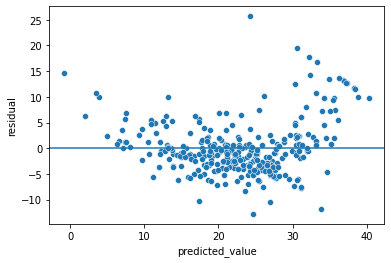

In [20]:
# calculate residuals
residual = y_boston_train - y_predict_train

# prepare dataframe
# 1 predictor --> predictor VS residual
df_resid = pd.DataFrame({
    'predicted_value': y_predict_train,
    'residual': residual
})

# residual plot
sns.scatterplot(data=df_resid, x="predicted_value", y="residual")
plt.axhline(0)
plt.show()

Training error

In [21]:
# prepare prediction result on train data
y_predict_train = ridge_best.predict(X_boston_train)

In [22]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for training data is {}'.format(np.sqrt(mean_squared_error(y_predict_train, y_boston_train))))
print('MAE for training data is {}'.format(mean_absolute_error(y_predict_train, y_boston_train)))
print('MAPE for training data is {}'.format(mean_absolute_percentage_error(y_predict_train, y_boston_train)))

RMSE for training data is 4.7987484241878375
MAE for training data is 3.4193137443723653
MAPE for training data is 0.214492480023241


RMSE
is 4.79 the square root of the average of square difference between the prediction and the actual observation

MAE
on average the predictions deviates the true medv 3.42

MAPE
on average, the predictions distance from the true value is 21.4% of the actual data (medv)

Testing error

In [23]:
# prepare prediction result on test data
X_boston_test = feature_boston_test.to_numpy()
y_predict_test = ridge_best.predict(X_boston_test)

# ground truth target
y_boston_test = target_boston_test.to_numpy()
y_boston_test = y_boston_test.reshape(len(y_boston_test),)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_absolute_percentage_error

print('RMSE for testing data is {}'.format(np.sqrt(mean_squared_error(y_predict_test, y_boston_test))))
print('MAE for testing data is {}'.format(mean_absolute_error(y_predict_test, y_boston_test)))
print('MAPE for testing data is {}'.format(mean_absolute_percentage_error(y_predict_test, y_boston_test)))

RMSE for testing data is 5.149665041535447
MAE for testing data is 3.2464116865140884
MAPE for testing data is 0.2490353310066706


RMSE
is 5.14 the square root of the average of square difference between the prediction and the actual observation

MAE
on average the predictions deviates the true medv 3.24

MAPE
on average, the predictions distance from the true value is 24.9% of the actual data (medv)